# Product Notebook

In this notebook we are exploring 2 driving questions
- Did I achieve my goal of X steps more in the last 12 months than the 12 months before that?
- Do I have more steps on average during the weekend in comparison to a weekday?

In order to answer these questions we will be using datasets from 2 different people.

Note, the following parts of code was formatted and compiled from the following process notebooks:

Q1 EDA: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/blob/master/src/EDA%20week%207/Week08_GerryHow_DATA3406_EDA.ipynb

Q1 Generator Functions: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/blob/master/src/Week%209/12%20month%20exploration.ipynb

Q1 Plots: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/blob/master/src/Week%2010/Results%20plotting.ipynb

Q2 All Code: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/blob/master/src/Week11%20-%20James%20Park.ipynb

#  Import required libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from mayavi import mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
mlab.init_notebook()

# First read in data and clean data

Read in datasets using pandas


In [4]:
df1_raw = pd.read_csv('person1-step-data.csv')
df2_raw = pd.read_csv('person2-step-data.csv')

Check columns and their types, we can see that `Date` is still in str

In [5]:
print('Person 1 dtypes')
print(df1_raw.dtypes)
print('\nPerson 2 dtypes')
print(df2_raw.dtypes)

Person 1 dtypes
Source    object
Date      object
Hour       int64
Count      int64
dtype: object

Person 2 dtypes
Source    object
Date      object
Hour       int64
Count      int64
dtype: object


Convert columns to correct data type and drop missing values

In [6]:
df1 = df1_raw.dropna()
df2 = df2_raw.dropna()
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Exploratory Analysis

Now we can explore the data, here we check number of 
- rows and columns
- unique number of sources step counts were gathered from
- start and end of data collection
- number of days where data is present
- quick check for the `hour` column

In [7]:
def summary(df):
    print(f"df shape: {df.shape}")
    print(f"Sources include {df['Source'].unique()}")
    print(f"First day: {df['Date'].min()}")
    print(f"Last day: {df['Date'].max()}")
    print(f"Number of days: {len(df['Date'].unique())}")
    print(f"First hour: {df['Hour'].min()}")
    print(f"Last hour: {df['Hour'].max()}")

In [8]:
summary(df1)

df shape: (183787, 4)
Sources include ['Person1 iPhone SE' 'Person1 Mi Fit' 'Person1 Misfit'
 'Person1 Health Mate' 'Person1 Apple\xa0Watch']
First day: 2014-12-07 00:00:00
Last day: 2021-09-22 00:00:00
Number of days: 2295
First hour: 0
Last hour: 23


In [9]:
summary(df2)

df shape: (486259, 4)
Sources include ['Person2 Phone' 'Person2 Watch']
First day: 2014-11-29 00:00:00
Last day: 2021-09-22 00:00:00
Number of days: 2490
First hour: 0
Last hour: 23


Interestingly enough `person 2` only has two sources of data whereas `person one` has 5
`Person 1` started recording 9 days later, but has 195 fewer days recorded

We now create a dummy dataset of constant step counts for each day and collumns for 'Day of Week' and 'Is Weekday' so we can test both driving questions.

In [52]:
test_df = pd.DataFrame({'Date':np.arange(df1['Date'].min(), df1['Date'].max(), timedelta(days=1)).astype(datetime)})
test_df['Count'] = 5000

#add Day of the Week column
def gen_dayofweek(row):
    return row['Date'].weekday()
test_df['Day of Week'] = test_df.apply(gen_dayofweek, axis=1)
#add Is Weekday column
def gen_isweekday(row):
    if row['Day of Week'] < 5:
        return True
    else:
        return False
test_df['Is Weekday'] = test_df.apply(gen_isweekday, axis=1)

test_df

,Date,Count,Day of Week,Is Weekday
0,2014-12-07,5000,6,False
1,2014-12-08,5000,0,True
2,2014-12-09,5000,1,True
3,2014-12-10,5000,2,True
4,2014-12-11,5000,3,True
...,...,...,...,...
2476,2021-09-17,5000,4,True
2477,2021-09-18,5000,5,False
2478,2021-09-19,5000,6,False
2479,2021-09-20,5000,0,True


Now we create visualisations to understand the dataset better

In [11]:
def daily_steps(df):
    # Define plot params
    plt.rcParams["figure.figsize"] = (20,3)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # Set sub-plot titles
    ax1.set_title('Number of steps over time')
    ax2.set_title('Distribution of steps')
    plt.figure(figsize=(8, 6), dpi=80)
    df = df.groupby('Date').sum()
    # Create plots
    ax1.plot(df['Count'])
    ax2.boxplot(df['Count'])

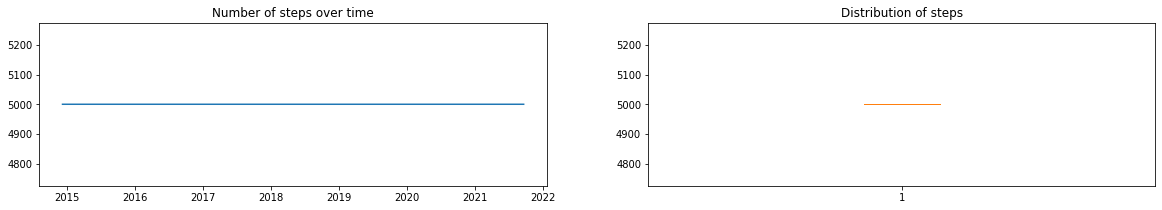

<Figure size 640x480 with 0 Axes>

In [12]:
daily_steps(test_df)

As expected the plots are flat because the dataset is constant.

Now we'll check the frequency of days in the test data.

In [54]:
#create empty list to store frequency of each day of the week data for test data
test_freq = []
#group by day of week
gtest_df = test_df.groupby('Day of Week')
#get keys for each group to loop through for both data sets
test_keys = gtest_df.groups.keys()
#loop through each group for person1, counting the number of days recorded
for i in test_keys:
    test_freq.append([str(i), gtest_df.get_group(i)['Date'].count()])
#create DataFrames from the now populated lists: day_freq1, day_freq2
test_freqdf = pd.DataFrame(test_freq, columns=['Day', 'Count'])
test_freqdf

,Day,Count
0,0,355
1,1,355
2,2,354
3,3,354
4,4,354
5,5,354
6,6,355


As we can see from the table above, the data is as expected with a difference of only 1 for the frequency of days.

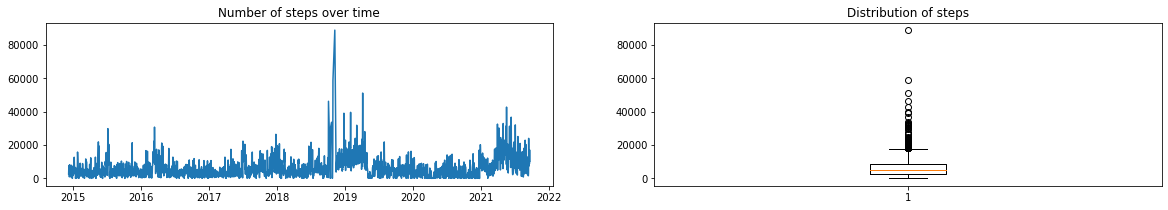

<Figure size 640x480 with 0 Axes>

In [55]:
daily_steps(df1)

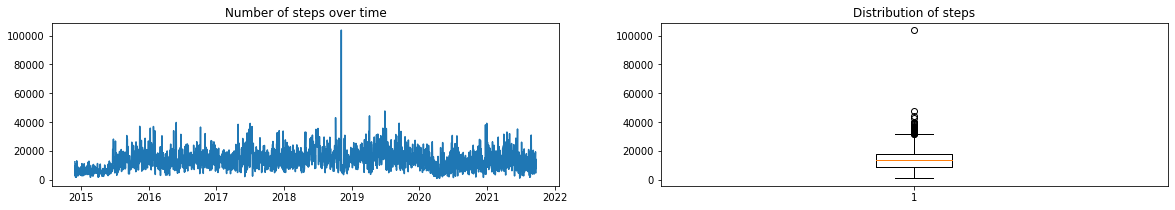

<Figure size 640x480 with 0 Axes>

In [14]:
daily_steps(df2)

Interestingly, there are a few days from both datasets where the respondent walked an incredible amount of steps, in some cases up to 90 thousand, we will remove days with more than 40000 steps and treat them as outliers

In [15]:
def clean_raw_df(df):
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Aggregate data into days
    df = df.groupby('Date').sum().reset_index()
    # Remove days with more than 40000 steps
    df[df['Count'] < 40000]
    return df

cleaned_1 = clean_raw_df(df1_raw)
cleaned_2 = clean_raw_df(df2_raw)

As the 2nd driving question: Do I have more steps on average during the weekend in comparison to a weekday?, divides the data by day of the week, it will be usefull to visualize the data accordingly. 
To do this, we need to group the data by day of the week.
First, we'll drop the 'Hour' collumn as it's no longer needed.

In [39]:
day_df1 = cleaned_1.drop(columns=['Hour'])
day_df2 = cleaned_2.drop(columns=['Hour'])

Now, we'll create new collumns for 'Day of Week' and 'Is Weekday' that we'll be able to group the data by.

In [56]:
#add Day of the Week column
day_df1['Day of Week'] = day_df1.apply(gen_dayofweek, axis=1)
day_df2['Day of Week'] = day_df2.apply(gen_dayofweek, axis=1)

In [57]:
#add Is Weekday column
day_df1['Is Weekday'] = day_df1.apply(gen_isweekday, axis=1)
day_df2['Is Weekday'] = day_df2.apply(gen_isweekday, axis=1)

In [58]:
day_df1

,Date,Count,Day of Week,Is Weekday
0,2014-12-07,2693,6,False
1,2014-12-08,6567,0,True
2,2014-12-09,6879,1,True
3,2014-12-10,7845,2,True
4,2014-12-11,916,3,True
...,...,...,...,...
2290,2021-09-18,11572,5,False
2291,2021-09-19,10789,6,False
2292,2021-09-20,8800,0,True
2293,2021-09-21,17071,1,True


As we can see, the 'Day of Week' collumn is in integer form. We'll create a dictionary so that we can change them into the corresponding words later.

In [59]:
daydict = {0:'Mon', 1:'Tues', 2:'Weds', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}

As the data can now be grouped by 'Day of the Week' and 'Is Weekday', we can create the relavant exploratory visualizations.

In [60]:
#create empty list to store frequency of each day of the week data for person 1 and 2
day_freq1 = []
day_freq2 = []
#group by day of week
gday_df1 = day_df1.groupby('Day of Week')
gday_df2 = day_df2.groupby('Day of Week')
#get keys for each group to loop through for both data sets
day_keys1 = gday_df1.groups.keys()
day_keys2 = gday_df2.groups.keys()
#loop through each group for person1, counting the number of days recorded
for i in day_keys1:
    day_freq1.append([daydict[i], gday_df1.get_group(i)['Date'].count()])
#loop through each group for person2, counting the number of days recorded 
for i in day_keys1:
    day_freq2.append([daydict[i], gday_df2.get_group(i)['Date'].count()])
#create DataFrames from the now populated lists: day_freq1, day_freq2
day_freq_df1 = pd.DataFrame(day_freq1, columns=['Day', 'Count'])
day_freq_df2 = pd.DataFrame(day_freq2, columns=['Day', 'Count'])

Now that we have a DataFrame containing each day of the week and the number of times that day is recorded, we can see the distribution for days of the week recorded.

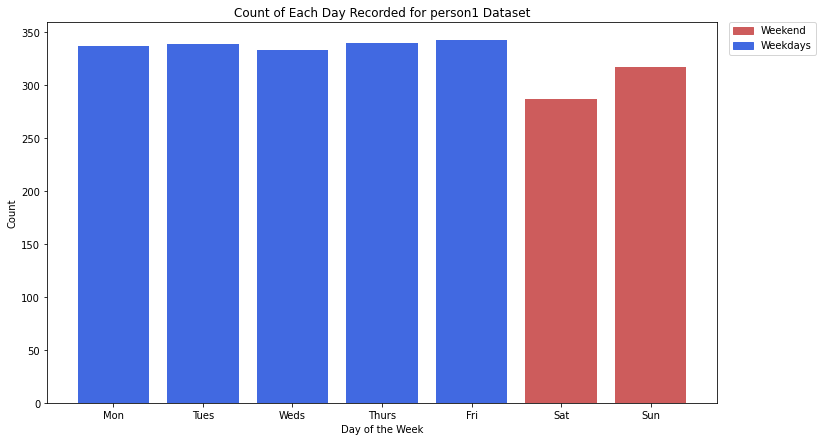

In [61]:
#graph count of each day for person1 data set
plt.bar(day_freq_df1['Day'], day_freq_df1['Count'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Each Day Recorded for person1 Dataset')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue], loc='best', bbox_to_anchor=(0.555, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)

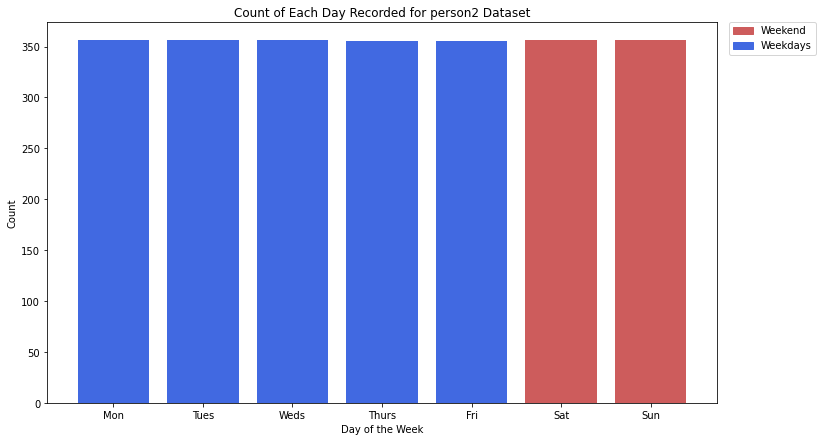

In [62]:
#graph count of each day for person2 data set
plt.bar(day_freq_df2['Day'], day_freq_df2['Count'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Each Day Recorded for person2 Dataset')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue], loc='best', bbox_to_anchor=(0.555, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)

From the two frequency visualizations above, we can tell that person 2 recorded nearly the same amount of days for each day of the week. Person 1 recorded less days on Saturdays and Sundays, but not by a very significant amount.

# Answering the Driving Questions

Different increments: YTD, weeks, months, whole years
Different metrics: average steps per day, total steps in 12 months
if its average steps per day, we could filter out days, and we'd look at different filter metrics

We now explore different ways of considering the driving question of `Last 12 months`, different ways of considering compliance, and different ways of comparing `last 12 months`.

First we create worker functions, here we create functions that decrement the dates in order to get the way it changes, as well as a few another functions to allow for different iterators and comparators to be  used.

In [17]:
# Main working function
def get_12_mo_comparison(metric, iterator):
    results = []
    for x,y in iterator:
        results.append(metric(x,y))
    return np.array(results)

# Considers days
def decrement_day(dt):
    return dt - timedelta(days = 1)

# Considers months
def decrement_month(dt):
    if dt.month > 1:
        return datetime(year = dt.year, month = dt.month - 1, day = dt.day)
    return datetime(year = dt.year - 1, month = 12, day = dt.day)

# Wraps function so its applied for all args provided
def get_single_return_wrapper(fn):
    def wrapper(*args):
        return [fn(dt) for dt in args]
    return wrapper

# Iterate subsets of time given df, operation to apply after subset, column to extract, and datetime incrementor
def ytd_iter(df, op, col, new_dt):
    start_1 = df['Date'].max()
    end_1 = datetime(year = start_1.year - 1, month = start_1.month, day = start_1.day)
    end_2 = datetime(year = start_1.year - 2, month = start_1.month, day = start_1.day)
    while end_2 >= df['Date'].min():
        y1 = df[(df['Date'] <= start_1) & (df['Date'] > end_1)][col] # Previous 12 months
        y2 = df[(df['Date'] <= end_1) & (df['Date'] > end_2)][col] # The 12 months before that
        yield op(y1), op(y2)
        start_1, end_1, end_2 = new_dt(start_1, end_1, end_2)

# Percentage where we walked more in the last 12 months to the 12 months before
def perc_greater(arr):
    return np.mean(arr>0)
def percent_metric(x,y, goal = 10000):
    return np.sum(x >= goal) - np.sum(y >= goal)

Here we define a function that takes in a dataframe and a integer goal that creates plots and outputs the percentage of times where the number of days which the goal was met compared to the 12 months before that. A percentage greater than 50% suggests that the person had, more often that not, walked more in the last 12 months compared to the 12 months before that.

In [18]:
%matplotlib inline

ignore = lambda x:x

def make_plot(df, goal):
    # Use the get 12 month comparison function from before to get the difference of last 12 months and 12 months before, 
    # decrementing 12 months each time and recomputing
    res_1_days_sum = get_12_mo_comparison(lambda x,y :percent_metric(x,y,goal), 
                                          ytd_iter(df, ignore, 'Count', 
                                                   get_single_return_wrapper(decrement_month)
                                                  )
                                         )
    print(perc_greater(res_1_days_sum)) # Get percentage of days where driving question was met

    # Get dates for plotting
    start_1 = df['Date'].max()
    dates = []
    end_1 = datetime(year = start_1.year - 1, month = start_1.month, day = start_1.day)
    end_2 = datetime(year = start_1.year - 2, month = start_1.month, day = start_1.day)
    dec = get_single_return_wrapper(decrement_month)
    while end_2 >= df['Date'].min():
        start_1, end_1, end_2 = dec(start_1, end_1, end_2)
        dates.append(start_1)

    # Plot results with dates
    plt.plot(dates,res_1_days_sum ,marker='x')
    plt.title(f'Did I reach {goal} steps in the last 12 months\n than the 12 months before that?')
    plt.xlabel('When am I asking the question?')
    plt.ylabel("How many more days did I reach my target last\n 12 months compared to the 12 before that?")
    plt.axhline(y=0, color='r', linestyle='-')

First we test the functions with the dummy dataset

0.0


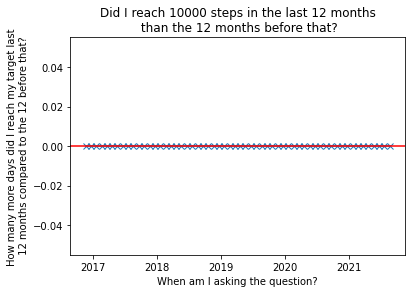

In [19]:
make_plot(test_df, 10000)

The plot is flat as expected from a constant dataset

Now we plot person 1 with a goal of 10000 steps

0.603448275862069


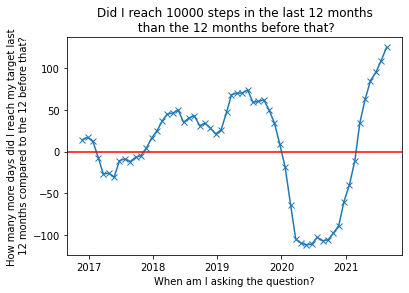

In [20]:
make_plot(cleaned_1,10000)

Here we can see that this person was progressively more and more active from 2018-2020, but experienced a sharp decline in reaching goals from 2020 onwards.

Now we take a look at person 2.

In [ ]:
%matplotlib inline
make_plot(cleaned_2, 10000)

We can see that person 2 was much more consistent from 2018 to 2020 as the difference in the number of days of goal met was around 0 from 2018 to 2020, but similar to person 1 experienced a sharp decline from 2020 onwards. This is likely due to the Covid-19 pandemic.

Now we shift the goal posts back to 5000 steps.

In [ ]:
%matplotlib inline
make_plot(cleaned_1,5000)

This plot is similar to the plot with 10000 steps, with largely similar shapes

In [ ]:
%matplotlib inline
make_plot(cleaned_2,5000)

Similarly with person 1, the reduced goal for person 2 also results in a plot with a largely identical shape.

We now investigate the effects of changing the goal on how each person is able to reach their goal in the last 12 months compare to the 12 months before that.

First we define functions required, such as generating data for 3D plots, and creating functions for 3D plots using `matplotlib` and `mayavi`

In [ ]:
def get_grid_3d(df):    
    X, Y, Z = [], [], []

    # Compute values as before for 2D line plots but with varying goals to create a 3D plot
    for lim in range(0,20000,1000):
        curr_met = lambda x,y : percent_metric(x,y,lim)
        cmpr = get_12_mo_comparison(curr_met, ytd_iter(df, ignore, 'Count', get_single_return_wrapper(decrement_month)))
        Z.append(cmpr)
        X.append(list(range(len(cmpr))))
        Y.append([lim]*len(cmpr))
    X,Y,Z = np.asarray(X),np.asarray(Y),np.asarray(Z)
    X = X.max() - X
    return X,Y,Z

def mpl3d(X,Y,Z):
    """
    Plots surface using matplotlib
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0,alpha = 0.9)
    ax.plot_surface(X, Y, 0*Z, alpha = 0.2, color='k') # Z=0 plane

    ax.set_ylabel('step goal')
    ax.set_zlabel('diff in days goal reached')
    ax.set_title('Effect of varying goal for person 1')
    fig = plt.gcf()
    fig.set_size_inches(6.5, 4.5)

def mlab3d(X,Y,Z):
    """
    Plots surface using matplotlib
    """
    s1 = mlab.surf(Y, X, np.zeros_like(Z), warp_scale='auto', opacity = 0.3)
    # Divide by max because of issues of Mayavi with different scales
    # Although the value for z axis is not correct, shape is the same
    s = mlab.surf(Y, X, (Z/Z.std()), warp_scale='auto')
    mlab.axes(xlabel='Step goal', ylabel='n-th 2 year period', zlabel='days better 12mo')
    return s

First we test with dummy data

In [ ]:
X, Y, Z = get_grid_3d(test_df)

mpl3d(X,Y,Z)

In [ ]:
mlab.figure()
mlab3d(X,Y,Z)

Plots are working as expected, jaggedness and sharp declines are caused by goals < 5000 (otherwise no goals are met, constant 0) and leap years (therefore 1 more/fewer day where goal is reached than previous year

3D plot using matplotlib

In [ ]:
%matplotlib inline
X, Y, Z = get_grid_3d(cleaned_2)

mpl3d(X,Y,Z)

We can see that 3D the `z=0` plane does not show up well in `matplotlib`. This is a known issue, an alternative, `Mayavi` can be used

In [ ]:
mlab.figure()
mlab3d(X,Y,Z)

We can see that for person 1, the lower the goal is, the larger the difference, meaning that the user was more likely to reach their goals for more days in the last 12 months compared to the year before that when the goal is lower, conversely as the goal increases, the difference between the last year and the year before that decreases.

In [ ]:
%matplotlib inline
X, Y, Z = get_grid_3d(cleaned_2)

mpl3d(X,Y,Z)

Visual bugs from plotting multiple surfaces can sometimes be seen in `matplotlib`

In [ ]:
mlab.figure()
mlab3d(X,Y,Z)

However for person 2, the lower the goal, the more likely they were to reach their goal, and the smaller the difference between years. When the goal is increased, the difference between the years were much bigger, seen in the large area beneath the z=0 plane in the plot on the left and the higher peaks.

We also elected to use both `Mayavi` and `matplotlib` plots because both has strengths and weaknesses. `matplotlib` conveys uncertainty well with grids as opposed to a smooth surface, but `Mayavi` is able to display the $z=0$ plane which allows for better understanding of when the person walked more or less than the year before

Final outputs in case widgets don't load

Plot for person 1:
![title](savedplots/snapshot.png)
Plot for person 2:
![title](savedplots/snapshot_person_2.png)

In conclusion, whether or not a person achieves their goal of walking more in the last 12 months compared to the 12 months before that is dependent on their goal, and thus has no strict answer.

The second driving: Do I have more steps on average during the weekend in comparison to a weekday?, can be answered for definitely. To answer this question, we need to group the data by day of the week and take the means of those groups.

In [64]:
#create empty list to store mean data for each day of the week for person 1 and 2
day_mean1 = []
day_mean2 = []
#group by day of week
gday_df1 = day_df1.groupby('Day of Week')
gday_df2 = day_df2.groupby('Day of Week')
#get keys for each group to loop through for both data sets
day_keys1 = gday_df1.groups.keys()
day_keys2 = gday_df2.groups.keys()
#loop through each group for person1, putting the day, mean of steps of that day and SEM in our new lists
for i in day_keys1:
    day_mean1.append([daydict[i], gday_df1.get_group(i)['Count'].mean(), gday_df1.get_group(i)['Count'].sem()])
#loop through each group for person2, putting the day, mean of steps of that day and SEM in our new lists
for i in day_keys2:
    day_mean2.append([daydict[i], gday_df2.get_group(i)['Count'].mean(), gday_df2.get_group(i)['Count'].sem()])
#create DataFrames from the now populated lists: day_freq1, day_freq2
day_mean_df1 = pd.DataFrame(day_mean1, columns = ['Day', 'Mean Steps', 'SEM'])
day_mean_df2 = pd.DataFrame(day_mean2, columns = ['Day', 'Mean Steps', 'SEM'])

In [65]:
day_mean_df1

,Day,Mean Steps,SEM
0,Mon,6004.833828,343.208084
1,Tues,6046.846608,298.956101
2,Weds,6300.564565,280.769149
3,Thurs,7034.276471,414.797480
4,Fri,6424.283626,316.143906
5,Sat,6111.533101,310.845323
6,Sun,6783.230284,336.442982


In [66]:
day_mean_df2

,Day,Mean Steps,SEM
0,Mon,13080.457865,331.018980
1,Tues,14603.320225,439.083670
2,Weds,13848.317416,353.043070
3,Thurs,14362.374648,335.633082
4,Fri,14236.408451,344.278649
5,Sat,11692.351124,384.393061
6,Sun,15901.306180,384.042860


The above DataFrames tell us which days had the highest mean steps for person1 and person2 respectively. 
Person1 averaged the most steps on Thursdays while person2 averaged the most steps on Sundays. However, it would be helpfull to also have the mean of the whole weekend or work week. To do that, we will have to group the data by 'Is Weekday'.

In [68]:
#group both datasets by weekend or weekday
gweek_df1 = day_df1.groupby('Is Weekday')
gweek_df2 = day_df2.groupby('Is Weekday')
#create keys
weekkeys1 = gweek_df1.groups.keys()
weekkeys2 = gweek_df2.groups.keys()
#create dict to translate True/False to weekday/weekend
weekdict = {True:'Weekday', False:'Weekend'}
#create empty lists to put weekday/weekend mean data
week_mean_data1 = []
week_mean_data2 = []
#loop through each group for person1 and get Weekday or Weekend, mean steps and SEM
for i in weekkeys1:
    week_mean_data1.append([weekdict[i], gweek_df1.get_group(i)['Count'].mean(), gweek_df1.get_group(i)['Count'].sem()])
#loop through each group for person2 and get Weekday or Weekend, mean steps and SEM
for i in weekkeys2:
    week_mean_data2.append([weekdict[i], gweek_df2.get_group(i)['Count'].mean(), gweek_df2.get_group(i)['Count'].sem()])
#create new dataframes with new mean data
week_mean_df1 = pd.DataFrame(week_mean_data1, columns = ['Period', 'Mean Steps', 'SEM'])
week_mean_df2 = pd.DataFrame(week_mean_data2, columns = ['Period', 'Mean Steps', 'SEM'])

In [69]:
week_mean_df1

,Period,Mean Steps,SEM
0,Weekend,6464.062914,230.424351
1,Weekday,6363.309876,149.665736


In [70]:
week_mean_df2

,Period,Mean Steps,SEM
0,Weekend,13796.828652,282.73120
1,Weekday,14025.868391,162.58822


Person1 averaged more steps during the Weekend while Person2 averaged more steps during the Weekdays. 
However, if we want to make comparisions between the days of the week and periods of weekdays and weekends, we should create a visualization with all the above mentioned data.

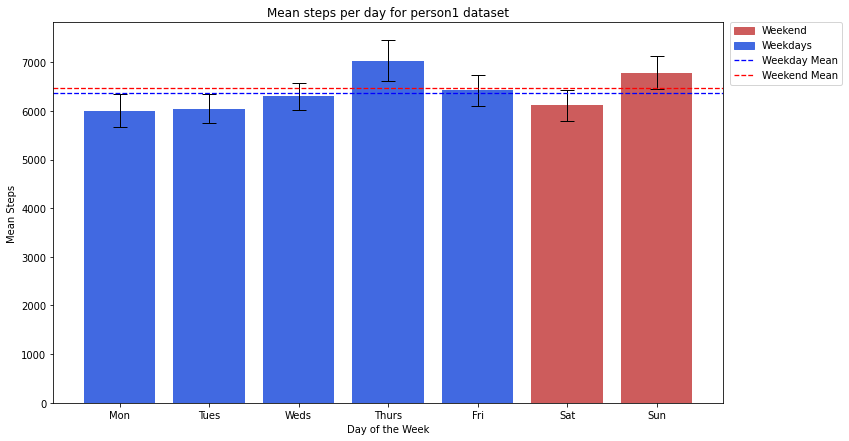

In [73]:
#graph means per day for person1 data set with error bars
plt.bar(day_mean_df1['Day'], day_mean_df1['Mean Steps'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
plt.errorbar(day_mean_df1['Day'], day_mean_df1['Mean Steps'], yerr=day_mean_df1['SEM'], capsize=7, elinewidth=1, markeredgewidth=1, color = 'black', ls='none')
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Mean Steps')
plt.title('Mean steps per day for person1 dataset')
#add weekday and weekend means
h1 = week_mean_df1[week_mean_df1['Period']=='Weekday']['Mean Steps'][1]
h2 = week_mean_df1[week_mean_df1['Period']=='Weekend']['Mean Steps'][0]
hline1 = plt.axhline(y=h1,linewidth=1.3, linestyle='--', label='Weekday Mean', color='blue')
hline2 = plt.axhline(y=h2,linewidth=1.3, linestyle='--', label='Weekend Mean', color='red')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue, hline1, hline2], loc='best', bbox_to_anchor=(0.585, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)

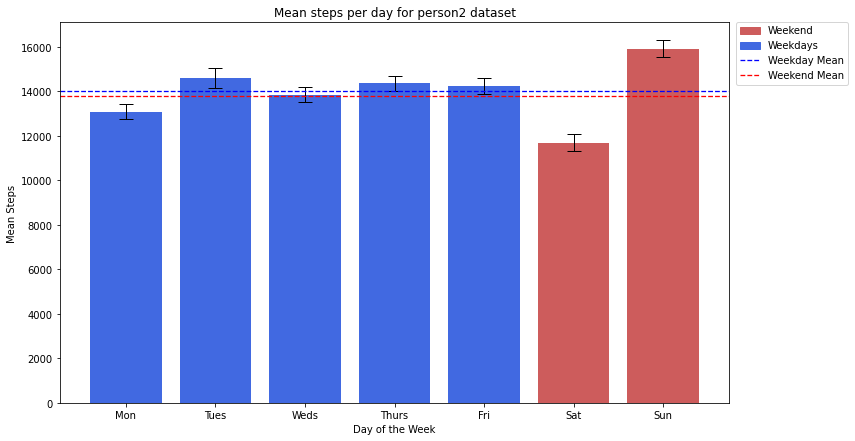

In [75]:
#graph means per day for person2 data set with error bars
plt.bar(day_mean_df2['Day'], day_mean_df2['Mean Steps'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
plt.errorbar(day_mean_df2['Day'], day_mean_df2['Mean Steps'], yerr=day_mean_df2['SEM'], capsize=7, elinewidth=1, markeredgewidth=1, color = 'black', ls='none')
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Mean Steps')
plt.title('Mean steps per day for person2 dataset')
#add weekday and weekend means
h1 = week_mean_df2[week_mean_df2['Period']=='Weekday']['Mean Steps'][1]
h2 = week_mean_df2[week_mean_df2['Period']=='Weekend']['Mean Steps'][0]
plt.axhline(y=h1,linewidth=1.3, linestyle='--', label='Weekday Mean', color='blue')
plt.axhline(y=h2,linewidth=1.3, linestyle='--', label='Weekend Mean', color='red')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue, hline1, hline2], loc='best', bbox_to_anchor=(0.585, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)

Finally, we have one visualization per data set that shows mean steps per day with standard error of the mean, aslong as weekday and weekend means. 

The graph utilizes the Gestalt law of similarity as the different shades of blue and red are present in different details of the same group. Blue bars and a blue line symbolize weekdays while red bars and a red line symbolize the weekend.
The graph is friendly to the colour blind as all 3 types of color blindess are able to distinguish the primary colors: blue and red.

Libraries used

In [ ]:
installed_packages = !pip freeze
used_packages = ['pandas', 'os', 'matplotlib','datetime','numpy','mayavi']
_ = [print(x) for x in installed_packages if any(x.startswith(u) for u in used_packages)]